In [1]:
# Data set: https://www.kaggle.com/mirichoi0218/insurance
# Method: multiple regression

# To help visualize the difference between simple and multiple regression:
# Simple regression (2d space): We have a 2d coordinage system, where we try to find the best line for all data points.
# Multiple Regression (3d space): We have 3d coordinate system, where we try to find the best plain for all data points.
# Mutiple Regression (xd space): Same principle, but hard to imagine.
# import matplotlib.pyplot as plt

In [2]:
from keras import models
from keras import layers
from keras import optimizers
from sklearn import preprocessing
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [3]:
# Load raw data.
raw_insurance_data = pd.read_csv('insurance.csv', sep=',',header=1).values
print(raw_insurance_data[0])

# Shuffle data.
raw_insurance_data = shuffle(raw_insurance_data, random_state=0)
print(raw_insurance_data)

# Split into train data and train targets.
insurance_data_x = raw_insurance_data[:, 0:5] # TODO: handle location also
insurance_data_y = raw_insurance_data[:, 6]
print(insurance_data_x[0])
print(insurance_data_y[0])

# Replace gender with a number. 0 - male, 1 - female.
for i in insurance_data_x:
    if i[1] == 'male':
        i[1] = 0
    else:
        i[1] = 1
print(insurance_data_x)

# Replace smoker with a number. 0 - no smoker, 1 - smoker.
for i in insurance_data_x:
    if i[4] == 'no':
        i[4] = 0
    else:
        i[4] = 1
print(insurance_data_x)

# Normalize all values between 0 and 1.
min_max_scaler = preprocessing.MinMaxScaler()
v = insurance_data_x[:]
v_scaled = min_max_scaler.fit_transform(v)
insurance_data_x = v_scaled
print(insurance_data_x)

# Save some values later for manual for testing.
insurance_data_x_not_used_for_learning = insurance_data_x[-10:]
insurance_data_y_not_used_for_learning = insurance_data_y[-10:]
insurance_data_x = insurance_data_x[:-10]
insurance_data_y = insurance_data_y[:-10]
print(len(insurance_data_x_not_used_for_learning))
print(len(insurance_data_y_not_used_for_learning))
print(len(insurance_data_x))
print(len(insurance_data_y))

[18 'male' 33.77 1 'no' 'southeast' 1725.5523]
[[18 'female' 39.82 ... 'no' 'southeast' 1633.9618]
 [47 'female' 29.37 ... 'no' 'southeast' 8547.6913]
 [46 'female' 32.3 ... 'no' 'northeast' 9411.005]
 ...
 [29 'male' 37.29 ... 'no' 'southeast' 4058.1161]
 [46 'female' 19.95 ... 'no' 'northwest' 9193.8385]
 [53 'male' 26.41 ... 'no' 'northeast' 11244.3769]]
[18 'female' 39.82 0 'no']
1633.9618
[[18 1 39.82 0 'no']
 [47 1 29.37 1 'no']
 [46 1 32.3 2 'no']
 ...
 [29 0 37.29 2 'no']
 [46 1 19.95 2 'no']
 [53 0 26.41 2 'no']]
[[18 1 39.82 0 0]
 [47 1 29.37 1 0]
 [46 1 32.3 2 0]
 ...
 [29 0 37.29 2 0]
 [46 1 19.95 2 0]
 [53 0 26.41 2 0]]
[[0.         1.         0.64191552 0.         0.        ]
 [0.63043478 1.         0.36077482 0.2        0.        ]
 [0.60869565 1.         0.43960183 0.4        0.        ]
 ...
 [0.23913043 0.         0.57384988 0.4        0.        ]
 [0.60869565 1.         0.10734463 0.4        0.        ]
 [0.76086957 0.         0.2811407  0.4        0.        ]]
10
10

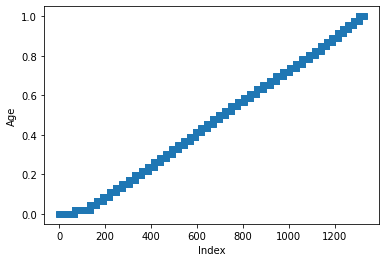

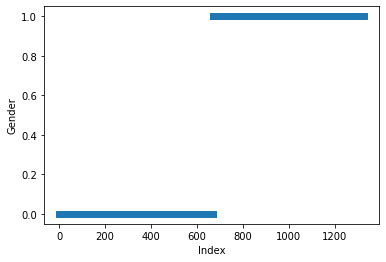

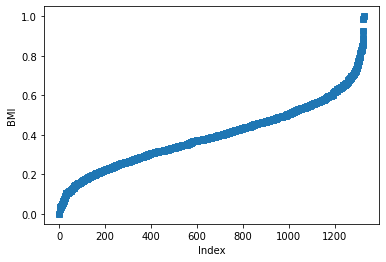

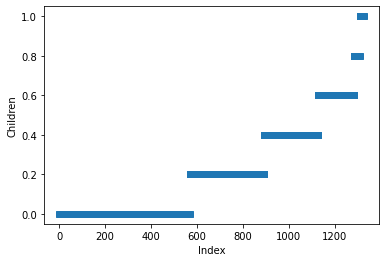

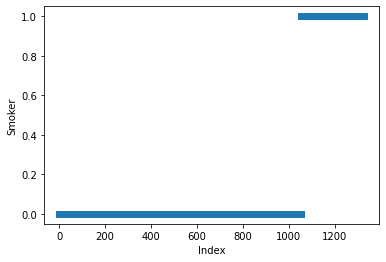

In [4]:
# Plot distributions of the dimensions.
age_data = insurance_data_x[:,0]
age_data.sort()
plt.plot(range(1, len(age_data) + 1), age_data, 's') 
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

gender_data = insurance_data_x[:,1]
gender_data.sort()
plt.plot(range(1, len(gender_data) + 1), gender_data, 's') 
plt.xlabel('Index')
plt.ylabel('Gender')
plt.show()

bmi_data = insurance_data_x[:,2]
bmi_data.sort()
plt.plot(range(1, len(bmi_data) + 1), bmi_data, 's') 
plt.xlabel('Index')
plt.ylabel('BMI')
plt.show()

children_data = insurance_data_x[:,3]
children_data.sort()
plt.plot(range(1, len(children_data) + 1), children_data, 's') 
plt.xlabel('Index')
plt.ylabel('Children')
plt.show()

smoker_data = insurance_data_x[:,4]
smoker_data.sort()
plt.plot(range(1, len(smoker_data) + 1), smoker_data, 's') 
plt.xlabel('Index')
plt.ylabel('Smoker')
plt.show()

In [5]:
# Split into train and validation data.
insurance_data_x_train = insurance_data_x[:-200]
insurance_data_x_val =insurance_data_x[-200:]
insurance_data_y_train = insurance_data_y[:-200]
insurance_data_y_val =insurance_data_y[-200:]
print(insurance_data_x_train)
print(insurance_data_x_val)
print(insurance_data_y_train)
print(insurance_data_y_val)

[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.02300242 0.         0.        ]
 [0.         0.         0.02300242 0.         0.        ]
 ...
 [0.82608696 1.         0.56483723 0.4        1.        ]
 [0.82608696 1.         0.56497175 0.4        1.        ]
 [0.82608696 1.         0.56604789 0.4        1.        ]]
[[0.82608696 1.         0.56604789 0.4        1.        ]
 [0.82608696 1.         0.56739306 0.6        1.        ]
 [0.82608696 1.         0.56739306 0.6        1.        ]
 [0.82608696 1.         0.56739306 0.6        1.        ]
 [0.82608696 1.         0.56793113 0.6        1.        ]
 [0.82608696 1.         0.56793113 0.6        1.        ]
 [0.82608696 1.         0.56793113 0.6        1.        ]
 [0.82608696 1.         0.56873823 0.6        1.        ]
 [0.82608696 1.         0.56873823 0.6        1.        ]
 [0.82608696 1.         0.56873823 0.6        1.        ]
 [0.82608696 1.         0.56873823 0.6        1.        ]
 [0.8260

In [6]:
# Build and train our model.
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu',input_shape=(insurance_data_x.shape[1],))) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 

history = model.fit(insurance_data_x_train, insurance_data_y_train,
                        validation_data=(insurance_data_x_val, insurance_data_y_val),
                        epochs=20, batch_size=1)

Train on 1127 samples, validate on 200 samples
Epoch 1/20
1127/1127 [==============================] - 1s 785us/step - loss: 316845803.5087 - mae: 12960.2920 - val_loss: 239057962.5776 - val_mae: 10361.9727
Epoch 2/20
1127/1127 [==============================] - 1s 728us/step - loss: 240470103.4977 - mae: 10302.7373 - val_loss: 134246249.9501 - val_mae: 8346.8779
Epoch 3/20
1127/1127 [==============================] - 1s 697us/step - loss: 176517220.2582 - mae: 8968.9756 - val_loss: 156163840.3464 - val_mae: 10882.8135
Epoch 4/20
1127/1127 [==============================] - 1s 717us/step - loss: 164273300.2140 - mae: 9084.9082 - val_loss: 166003728.4041 - val_mae: 11418.7090
Epoch 5/20
1127/1127 [==============================] - 1s 715us/step - loss: 160715207.6832 - mae: 9129.9375 - val_loss: 157459413.2949 - val_mae: 10959.8555
Epoch 6/20
1127/1127 [==============================] - 1s 729us/step - loss: 158716150.0549 - mae: 9049.6836 - val_loss: 153995345.4244 - val_mae: 10752.891

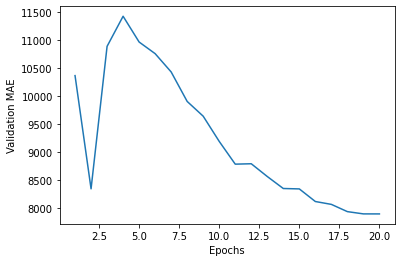

In [7]:
# Print our val loss to catch over/underfitting. 20 Epochs seems fine for now.
mae_history = history.history['val_mae']
plt.plot(range(1, len(mae_history) + 1), mae_history) 
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [8]:
# Check prediction of our model.
predictions = model.predict(insurance_data_x_not_used_for_learning)
print(np.int_(insurance_data_y_not_used_for_learning))
print(np.int_(predictions.reshape(len(predictions))))

[ 9174  4561  1633 12928 12950  9095  4402  4058  9193 11244]
[14869 10195 12999 14595 16587 11023 14131 14183 10108 13319]
